In [4]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, filters, transform, color, exposure
from skimage.feature import orb, match_descriptors, plot_matches, corner_harris, corner_orientations, corner_peaks, corner_fast

from skimage.feature.util import _prepare_grayscale_input_2D

In [9]:
def prepare(im : np.ndarray):
    return filters.gaussian(color.rgb2gray(im), sigma=0.5)

In [10]:
# Setup and prepare the image to work on
input_img = data.camera()
img = prepare(input_img)

In [11]:
detector = orb.ORB()

## `_detect_octave`

In [2]:
OFAST_MASK = np.zeros((31, 31))
def imshow(plot: plt.axis, octave):
    plot[0].imshow(octave)  # Original
    fast_response = corner_fast(octave, 9, 0.08)  # TODO: This is dependent on 2d image input
    plot[1].imshow(fast_response)
    keypoints = corner_peaks(fast_response, min_distance=1)
    # print(keypoints)
    plot[2].imshow(octave)
    plot[2].scatter(keypoints[:,1], keypoints[:,0], c='red', s=1)

    orientations = corner_orientations(octave, keypoints,
                                           OFAST_MASK)
    
    # The feature points are evaluated based on their harris score
    harris_response = corner_harris(octave, method='k', k=0.04)
    plot[3].imshow(harris_response)
    responses = harris_response[keypoints[:, 0], keypoints[:, 1]]
    print(responses.shape)

pyramid = detector._build_pyramid(img)

fig, axes = plt.subplots(4, len(pyramid), figsize=(32,20))
for i, octave in enumerate(pyramid):
    
    imshow(axes[:,i], octave)

plt.show()

NameError: name 'np' is not defined

S:\Users\halvo\Anaconda3\envs\learning-openCV\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.


3
3


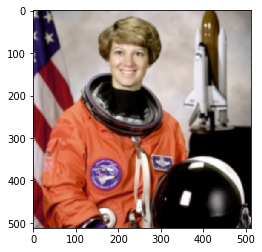

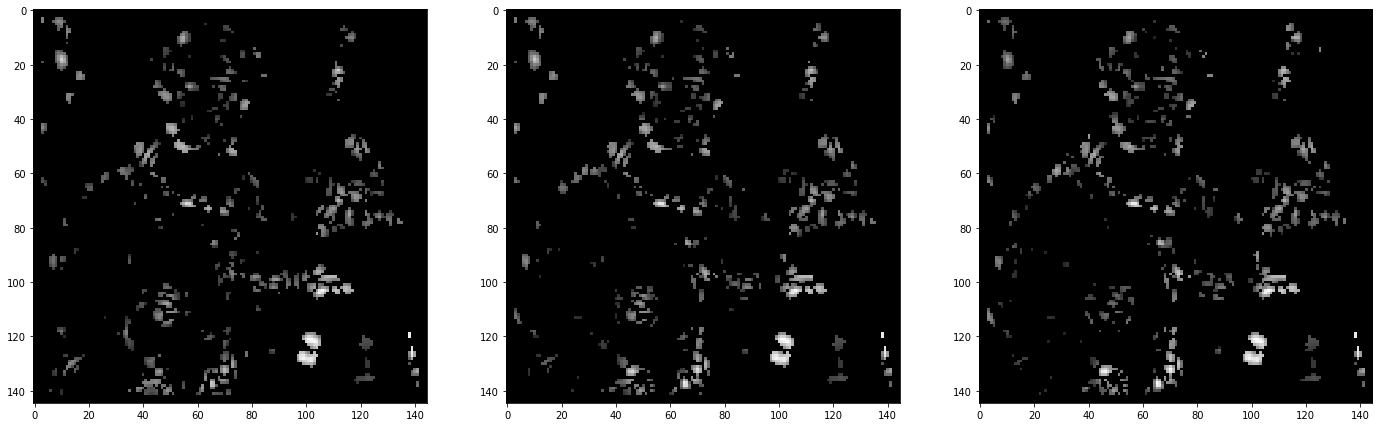

In [12]:
def detect_multichannel(octave: np.ndarray): 
    
    fast_responses = []
    for channel in range(octave.shape[2]):
        fast_responses.append(corner_fast(octave[:,:,channel], n=9, threshold=0.08))
    
    print(len(fast_responses))
    
    fig, axes = plt.subplots(1, len(fast_responses), figsize=(24, 24))
    for i in range(len(fast_responses)):
        axes[i].imshow(fast_responses[i], cmap="gray")
    
    combined = np.array(fast_responses)   
    # print(combined.shape)
    # plt.imshow(combined)
    plt.show()

img = filters.gaussian(data.astronaut(), sigma=1.5)
plt.imshow(img)
multichannel_pyramid = detector._c_build_pyramid(img, multichannel=True)
# print(len(multichannel_pyramid))
detect_multichannel(multichannel_pyramid[7])

In [ ]:

# multichannel_pyramid = detector.build_pyramid_multichannel(img)


# Determine octaves from scales
octaves = (np.log(detector.scales) / np.log(detector.downscale)).astype(np.intp)
print(octaves)
fig, axes = plt.subplots(1, len(multichannel_pyramid), figsize=(32,128))
for i, octave in enumerate(multichannel_pyramid):
    axes[i].imshow(octave)
plt.show()
    

In [ ]:
# Plot the images and matches

# fig, axes = plt.subplots(1, 1)
# 
# plot_matches(axes, img, img_rotated, detectorA.keypoints, detectorB.keypoints, matches)
# 
# plt.show()